National happiness depends on multiple structural and social factors, such as GDP per capita, social support and perceived freedom, which are themselves often tightly inter‑related. Correlation analysis can reveal clusters of factors that tend to move together, indicating potential redundancy or shared underlying dimensions. 

In this project, happiness data from 2015–2019 are combined with country‑level unemployment rates to examine, first, which original happiness predictors are most strongly inter‑correlated, and second, whether unemployment provides additional explanatory power for happiness beyond these overlapping relationships. 

Using a combination of correlation matrices, partial correlations and regressions, the analysis evaluates whether unemployment captures something substantively new about wellbeing or largely reflects existing economic and social factors.

This notebook is organised into multiple parts, as explained by individual markdowns. The parts are as follows:

1. Set-up, cleaning, pre-processing and merging

2. Factor Correlations

3. XYZ

Part 1, Set-up, cleaning, pre-processing and merging:

This section involved importing all relevant libraries and loading in the data.

We then worked with the happiness datasets, renaming and dropping columns in each individual happiness score dataset from 2015 - 2019 before merging them together. We also had to rename or drop countries that did not appear or were called different things in each year's dataset respectively.

Afterwards, we tackled the unemployment dataset in the same way, alongside combining all of the years into one column and removing unecessary columns.

Finally, we combined the two clean datasets into one dataframe to work with.

In [105]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
git_url = 'https://github.com/knnthfrmn/dsc25_group.git'

In [106]:
# load all data

unemployment_data = pd.read_csv('data/global_unemployment_data.csv')
happiness_2015 = pd.read_csv('data/happiness data/2015.csv')
happiness_2016 = pd.read_csv('data/happiness data/2016.csv')
happiness_2017 = pd.read_csv('data/happiness data/2017.csv')
happiness_2018 = pd.read_csv('data/happiness data/2018.csv')
happiness_2019 = pd.read_csv('data/happiness data/2019.csv')

# add year column to happiness dataframes

happiness_2015['Year'] = 2015
happiness_2016['Year'] = 2016
happiness_2017['Year'] = 2017
happiness_2018['Year'] = 2018
happiness_2019['Year'] = 2019


In [107]:
happiness_2015 = happiness_2015.rename(columns={'Economy (GDP per Capita)': 'GDP per cap', 
                                                'Health (Life Expectancy)': 'Life Expectancy', 
                                                'Trust (Government Corruption)': 'Corruption'})

In [108]:
happiness_2015 = happiness_2015.drop(columns={'Region', 'Standard Error', 'Dystopia Residual'})

In [109]:
happiness_2016 = happiness_2016.rename(columns={'Economy (GDP per Capita)': 'GDP per cap', 
                                                'Health (Life Expectancy)': 'Life Expectancy', 
                                                'Trust (Government Corruption)': 'Corruption'})

In [110]:
happiness_2016 = happiness_2016.drop(columns={'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'})

In [111]:
happiness_2017 = happiness_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 
                                                'Happiness.Score': 'Happiness Score', 
                                                'Economy..GDP.per.Capita.': 'GDP per cap',
                                                'Health..Life.Expectancy.': 'Life Expectancy',
                                                'Trust..Government.Corruption.': 'Corruption'})

In [112]:
happiness_2017 = happiness_2017.drop(columns={'Whisker.high', 'Whisker.low', 'Dystopia.Residual'})

In [113]:
happiness_2018 = happiness_2018.rename(columns={'GDP per capita': 'GDP per cap',
                                                'Country or region': 'Country',
                                                'Score': 'Happiness Score',
                                                'Overall rank': 'Happiness Rank',
                                                'Social support': 'Family',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Perceptions of corruption': 'Corruption',
                                                'Freedom to make life choices': 'Freedom'})

In [114]:
happiness_2019 = happiness_2019.rename(columns={'GDP per capita': 'GDP per cap',
                                                'Country or region': 'Country',
                                                'Score': 'Happiness Score',
                                                'Overall rank': 'Happiness Rank',
                                                'Social support': 'Family',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Perceptions of corruption': 'Corruption',
                                                'Freedom to make life choices': 'Freedom'})

In [115]:
# merge all happiness data by year into one big dataframe
happiness_data = pd.concat([happiness_2015, happiness_2016, happiness_2017, happiness_2018, happiness_2019])

In [116]:
happiness_data = happiness_data.reset_index()
happiness_data.head()

,index,Country,Happiness Rank,Happiness Score,GDP per cap,Family,Life Expectancy,Freedom,Corruption,Generosity,Year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [117]:
happiness_data = happiness_data.drop(columns={'index'})
happiness_data

,Country,Happiness Rank,Happiness Score,GDP per cap,Family,Life Expectancy,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [118]:
happiness_data['Country'].describe()

count             782
unique            170
top       Switzerland
freq                5
Name: Country, dtype: object

In [119]:
# count how many countries don't appear in all 5 separate dataframes
pd.Series.value_counts(happiness_data['Country'].value_counts() != 5)

count
False    141
True      29
Name: count, dtype: int64

In [120]:
# look at which countries don't appear in all 5 separate dataframes
(happiness_data['Country'].value_counts() != 5).tail(29)

Country
Hong Kong                   True
Somalia                     True
Namibia                     True
Central African Republic    True
South Sudan                 True
Macedonia                   True
Laos                        True
Mozambique                  True
Angola                      True
Sudan                       True
Lesotho                     True
Taiwan                      True
Trinidad and Tobago         True
Comoros                     True
North Cyprus                True
Belize                      True
Trinidad & Tobago           True
Suriname                    True
Northern Cyprus             True
Swaziland                   True
Hong Kong S.A.R., China     True
North Macedonia             True
Somaliland region           True
Puerto Rico                 True
Taiwan Province of China    True
Somaliland Region           True
Djibouti                    True
Oman                        True
Gambia                      True
Name: count, dtype: bool

In [121]:
# Taiwan, Hong Kong, and Somaliland Region have duplicate namings, so can be combined
drop = ['2014','2020','2021','2022','2023','2024']
unemployment_data = unemployment_data.drop(columns = drop)
#unemployment_data = unemployment_data[(unemployment_data['year'] >= start_year) & (df['year'] <= end_year)]
#standardizing names
unemployment_data['Country'] = unemployment_data['country_name']
happiness_data['Country'] = happiness_data['Country'].replace({'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
happiness_data['Country'] = happiness_data['Country'].replace({'Congo (Brazzaville)':'Congo'})
happiness_data['Country'] = happiness_data['Country'].replace({'Iran':'Iran, Islamic Republic of'})
unemployment_data['Country'] = unemployment_data['Country'].replace({'Viet Nam':'Vietnam'})
unemployment_data['Country'] = unemployment_data['Country'].replace({'Czechia':'Czech Republic'})
happiness_data['Country'] = happiness_data['Country'].replace({'Hong Kong S.A.R., China':'Hong Kong'})
happiness_data['Country'] = happiness_data['Country'].replace({'Taiwan Provice of China':'Taiwan'})
unemployment_data['Country'] = unemployment_data['Country'].replace({'Taiwan, China':'Taiwan'})

happiness_data['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [122]:
unemployment_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Ivory Coast', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau'

In [123]:
unemployment_data.head()

,country_name,indicator_name,sex,age_group,age_categories,2015,2016,2017,2018,2019,Country
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,15.974,18.570,21.137,20.649,20.154,Afghanistan
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,9.014,9.463,9.920,11.223,12.587,Afghanistan
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,11.552,12.789,14.017,14.706,15.418,Afghanistan
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,11.502,13.772,16.027,15.199,14.361,Afghanistan
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.879,7.301,7.728,7.833,7.961,Afghanistan


In [124]:
year_cols = ['2015', '2016', '2017', '2018', '2019']

long_unemp = unemployment_data.melt(
    id_vars=['country_name', 'sex', 'age_group', 'age_categories', 'Country'],
    value_vars=year_cols,
    var_name='year',
    value_name='unemployment_rate'
)
long_unemp['year'] = long_unemp['year'].astype(int)

In [125]:
long_unemp.drop(columns=['country_name', 'sex', 'age_categories'])
#remove superfluous data

,age_group,Country,year,unemployment_rate
0,15-24,Afghanistan,2015,15.974
1,25+,Afghanistan,2015,9.014
2,Under 15,Afghanistan,2015,11.552
3,15-24,Afghanistan,2015,11.502
4,25+,Afghanistan,2015,6.879
...,...,...,...,...
5665,25+,Zimbabwe,2019,5.309
5666,Under 15,Zimbabwe,2019,6.990
5667,15-24,Zimbabwe,2019,11.048
5668,25+,Zimbabwe,2019,6.362


In [126]:
avg_country_year = (long_unemp.groupby(['Country', 'year'])['unemployment_rate'].mean().reset_index())
#creating single unemployment rate per country+year

In [127]:
avg_country_year = avg_country_year.rename(columns={'year': 'Year', 'unemployment_rate' : 'Unemployment'})
#standardized column names

In [128]:
avg_country_year

,Country,Year,Unemployment
0,Afghanistan,2015,10.546000
1,Afghanistan,2016,11.876167
2,Afghanistan,2017,13.198167
3,Afghanistan,2018,13.291167
4,Afghanistan,2019,13.401833
...,...,...,...
940,Zimbabwe,2015,5.982500
941,Zimbabwe,2016,6.573167
942,Zimbabwe,2017,7.088667
943,Zimbabwe,2018,7.594667


In [129]:
avg_country_year['Country Year'] = avg_country_year['Country'].astype(str) + '_' + avg_country_year['Year'].astype(str)
happiness_data['Country Year'] = happiness_data['Country'].astype(str) + '_' + happiness_data['Year'].astype(str)
#merge data frames on new, common column
combined_df = pd.merge(happiness_data, avg_country_year, on=['Country Year'])

In [130]:
#remove superfluous columns
drop_2 = ['Country_x','Year_x']
combined_df = combined_df.drop(columns = drop_2)
#combined_df

In [131]:
#checking for nan to ensure smooth merge
combined_df['Freedom'].isna().any()

np.False_

In [132]:
combined_df['Unemployment'].isna().any()

np.False_

In [133]:
combined_df = combined_df.rename(columns={'Country_y':'Country','Year_y':'Year'})
combined_df

,Happiness Rank,Happiness Score,GDP per cap,Family,Life Expectancy,Freedom,Corruption,Generosity,Country Year,Country,Year,Unemployment
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Switzerland_2015,Switzerland,2015,5.942000
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Iceland_2015,Iceland,2015,5.178333
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Denmark_2015,Denmark,2015,7.906000
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Norway_2015,Norway,2015,5.854667
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Canada_2015,Canada,2015,8.526167
...,...,...,...,...,...,...,...,...,...,...,...,...
717,151,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,Yemen_2019,Yemen,2019,25.470000
718,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,Rwanda_2019,Rwanda,2019,12.383500
719,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,Afghanistan_2019,Afghanistan,2019,13.401833
720,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,Central African Republic_2019,Central African Republic,2019,6.985000


Part 2, Factor Correlations:

In this section, we began playing around and experimenting with what factors had strong/weak correlations between them. 

For each graph, we have modelled the relationships and found the pearson coefficients, the r values and the r^2 values. Following each, we have included a short analysis.

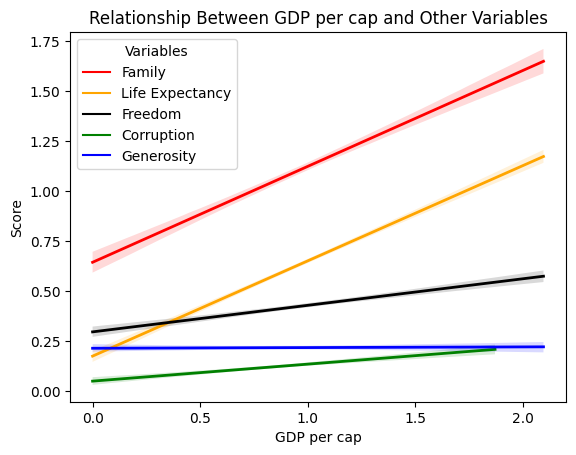

Model Evaluation:
GDP per cap x Family:  r = 0.597,   p = 0.000,   R-squared = 0.357
GDP per cap x Life Expectancy:  r = 0.787,   p = 0.000,   R-squared = 0.619
GDP per cap x Freedom:  r = 0.360,   p = 0.000,   R-squared = 0.129
GDP per cap x Corruption:  r = 0.328,   p = 0.000,   R-squared = 0.108
GDP per cap x Generosity:  r = 0.012,   p = 0.757,   R-squared = 0.000


In [ ]:
# Visualise all linear relationships between happiness score contributors
# Visualised as how 'x' variable is related with all other variables

x_var = 'GDP per cap'
y_vars = ['Family', 'Life Expectancy', 'Freedom', 'Corruption', 'Generosity']
colors = ['red', 'orange', 'black', 'green', 'blue']

handles = []
for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()

# Also show how 'good' of a model each line is using r-squared and pearson

print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()

    X = df_clean[[x_var]].values
    Y = df_clean[y].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # R-squared
    r2 = model.score(X, Y)

    # Pearson correlation
    r, p = pearsonr(df_clean[x_var], df_clean[y])

    print(f"{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}")

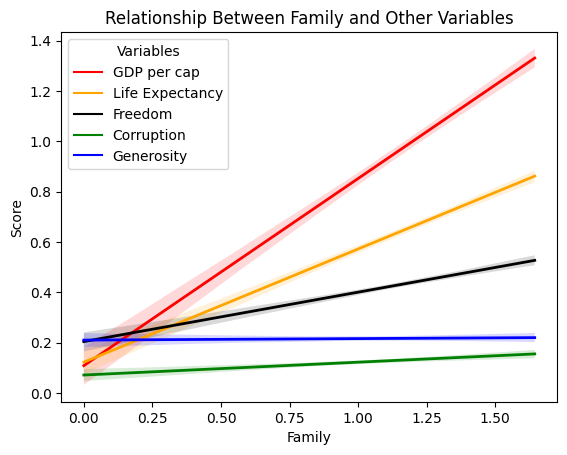

Model Evaluation:
Family x GDP per cap:  r = 0.597,   p = 0.000,   R-squared = 0.357
Family x Life Expectancy:  r = 0.597,   p = 0.000,   R-squared = 0.356
Family x Freedom:  r = 0.427,   p = 0.000,   R-squared = 0.182
Family x Corruption:  r = 0.159,   p = 0.000,   R-squared = 0.025
Family x Generosity:  r = 0.016,   p = 0.665,   R-squared = 0.000


In [135]:
x_var = 'Family'
y_vars = ['GDP per cap', 'Life Expectancy', 'Freedom', 'Corruption', 'Generosity']
colors = ['red', 'orange', 'black', 'green', 'blue']

for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()

print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()
    X = df_clean[x_var].values
    Y = df_clean[y].values
    r, p = pearsonr(X, Y)
    coeffs = np.polyfit(X, Y, 1)
    pred = np.polyval(coeffs, X)
    r2 = r2_score(Y, pred)

    print(f'{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}')

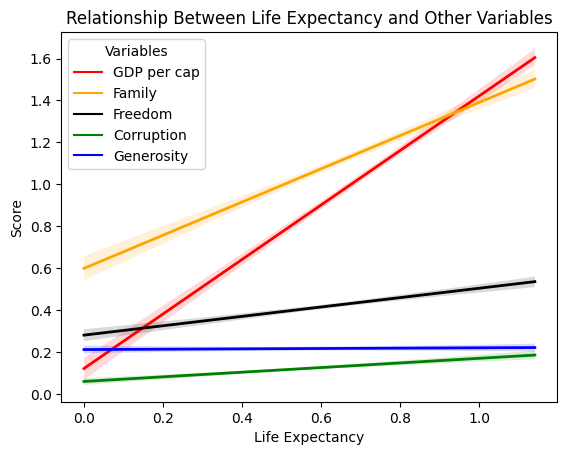

Model Evaluation:
Life Expectancy x GDP per cap:  r = 0.787,   p = 0.000,   R-squared = 0.619
Life Expectancy x Family:  r = 0.597,   p = 0.000,   R-squared = 0.356
Life Expectancy x Freedom:  r = 0.367,   p = 0.000,   R-squared = 0.135
Life Expectancy x Corruption:  r = 0.260,   p = 0.000,   R-squared = 0.067
Life Expectancy x Generosity:  r = 0.017,   p = 0.646,   R-squared = 0.000


In [136]:
x_var = 'Life Expectancy'
y_vars = ['GDP per cap', 'Family', 'Freedom', 'Corruption', 'Generosity']
colors = ['red', 'orange', 'black', 'green', 'blue']

for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()
print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()
    X = df_clean[x_var].values
    Y = df_clean[y].values
    r, p = pearsonr(X, Y)
    coeffs = np.polyfit(X, Y, 1)
    pred = np.polyval(coeffs, X)
    r2 = r2_score(Y, pred)

    print(f'{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}')


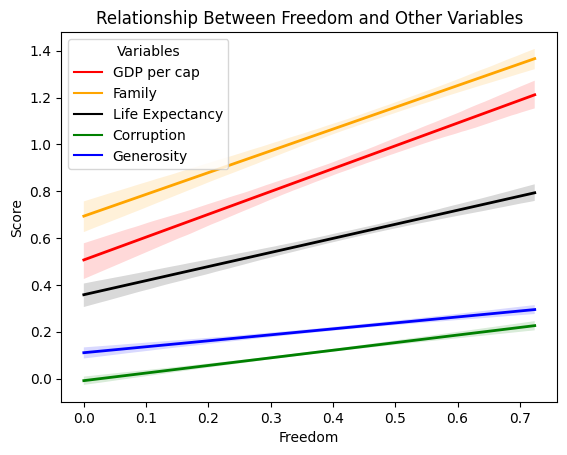

Model Evaluation:
Freedom x GDP per cap:  r = 0.360,   p = 0.000,   R-squared = 0.129
Freedom x Family:  r = 0.427,   p = 0.000,   R-squared = 0.182
Freedom x Life Expectancy:  r = 0.367,   p = 0.000,   R-squared = 0.135
Freedom x Corruption:  r = 0.465,   p = 0.000,   R-squared = 0.216
Freedom x Generosity:  r = 0.318,   p = 0.000,   R-squared = 0.101


In [137]:
x_var = 'Freedom'
y_vars = ['GDP per cap', 'Family', 'Life Expectancy', 'Corruption', 'Generosity']
colors = ['red', 'orange', 'black', 'green', 'blue']

for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()

print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()
    X = df_clean[x_var].values
    Y = df_clean[y].values
    r, p = pearsonr(X, Y)
    coeffs = np.polyfit(X, Y, 1)
    pred = np.polyval(coeffs, X)
    r2 = r2_score(Y, pred)

    print(f'{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}')


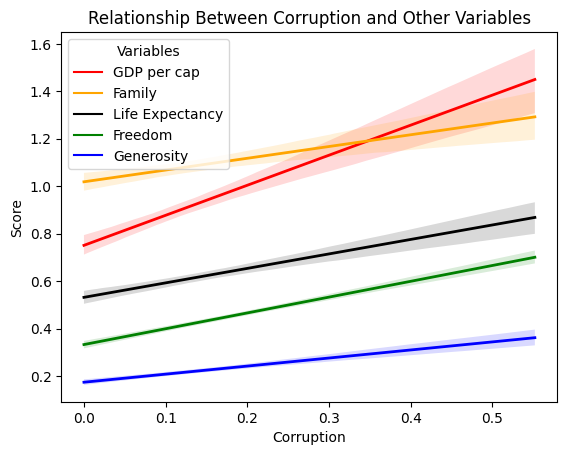

Model Evaluation:
Corruption x GDP per cap:  r = 0.328,   p = 0.000,   R-squared = 0.108
Corruption x Family:  r = 0.159,   p = 0.000,   R-squared = 0.025
Corruption x Life Expectancy:  r = 0.260,   p = 0.000,   R-squared = 0.067
Corruption x Freedom:  r = 0.465,   p = 0.000,   R-squared = 0.216
Corruption x Generosity:  r = 0.296,   p = 0.000,   R-squared = 0.088


In [138]:
x_var = 'Corruption'
y_vars = ['GDP per cap', 'Family', 'Life Expectancy', 'Freedom', 'Generosity']
colors = ['red', 'orange', 'black', 'green', 'blue']

for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()

print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()
    X = df_clean[x_var].values
    Y = df_clean[y].values
    r, p = pearsonr(X, Y)
    coeffs = np.polyfit(X, Y, 1)
    pred = np.polyval(coeffs, X)
    r2 = r2_score(Y, pred)

    print(f'{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}')


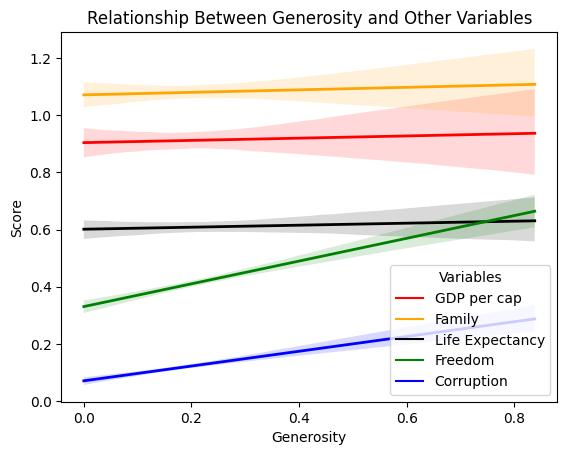

Model Evaluation:
Generosity x GDP per cap:  r = 0.012,   p = 0.757,   R-squared = 0.000
Generosity x Family:  r = 0.016,   p = 0.665,   R-squared = 0.000
Generosity x Life Expectancy:  r = 0.017,   p = 0.646,   R-squared = 0.000
Generosity x Freedom:  r = 0.318,   p = 0.000,   R-squared = 0.101
Generosity x Corruption:  r = 0.296,   p = 0.000,   R-squared = 0.088


In [139]:
x_var = 'Generosity'
y_vars = ['GDP per cap', 'Family', 'Life Expectancy', 'Freedom', 'Corruption']
colors = ['red', 'orange', 'black', 'green', 'blue']

for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()

print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()
    X = df_clean[x_var].values
    Y = df_clean[y].values
    r, p = pearsonr(X, Y)
    coeffs = np.polyfit(X, Y, 1)
    pred = np.polyval(coeffs, X)
    r2 = r2_score(Y, pred)

    print(f'{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}')

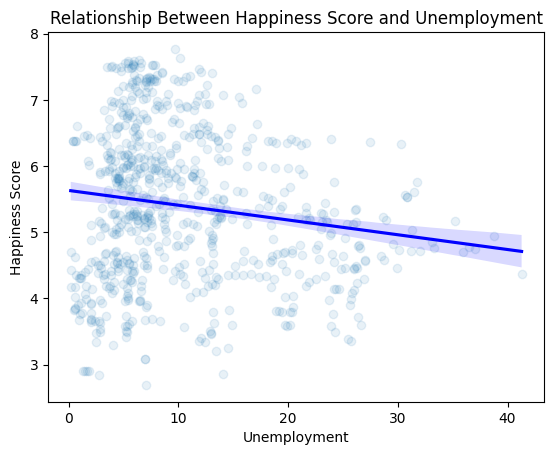

Model Evaluation:
Unemployment x Happiness Score:  r = -0.151,  p = 0.000,  R-squared = 0.023


In [143]:
# Visualise relationship between unemployment and happiness score

sns.regplot(data=combined_df, x='Unemployment', y='Happiness Score',
            scatter_kws={'alpha':0.1}, line_kws={'color':'blue'})

plt.xlabel('Unemployment')
plt.ylabel('Happiness Score')
plt.title('Relationship Between Happiness Score and Unemployment')
plt.show()

df_clean = combined_df[['Unemployment', 'Happiness Score']].dropna()

X = df_clean[['Unemployment']].values
Y = df_clean['Happiness Score'].values

# Linear regression model for r-squared
model = LinearRegression().fit(X, Y)
r2 = model.score(X, Y)

# Pearson correlation
r, p = pearsonr(df_clean['Unemployment'], df_clean['Happiness Score'])

print("Model Evaluation:")
print(f"Unemployment x Happiness Score:  r = {r:.3f},  p = {p:.3f},  R-squared = {r2:.3f}")


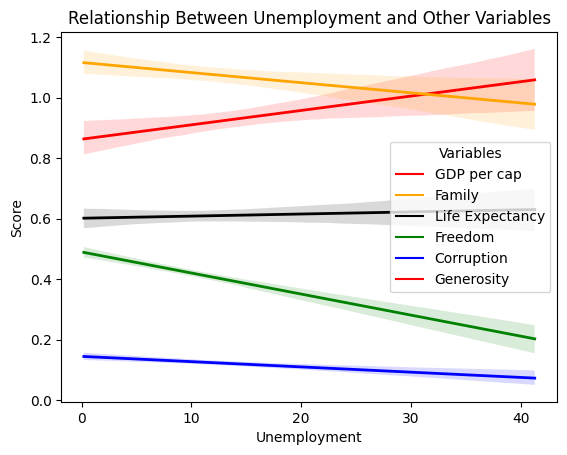

Model Evaluation:
Unemployment x GDP per cap:  r = 0.089,   p = 0.017,   R-squared = 0.008
Unemployment x Family:  r = -0.078,   p = 0.036,   R-squared = 0.006
Unemployment x Life Expectancy:  r = 0.022,   p = 0.563,   R-squared = 0.000
Unemployment x Freedom:  r = -0.353,   p = 0.000,   R-squared = 0.125
Unemployment x Corruption:  r = -0.127,   p = 0.001,   R-squared = 0.016
Unemployment x Generosity:  r = -0.345,   p = 0.000,   R-squared = 0.119


In [141]:
# Visualise the relationship between unemployment and happiness score contributors

x_var = 'Unemployment'
y_vars = ['GDP per cap', 'Family', 'Life Expectancy', 'Freedom', 'Corruption', 'Generosity']
colors = ['red', 'orange', 'black', 'green', 'blue']

for y, c in zip(y_vars, colors):

    sns.regplot(
        data=combined_df,
        x=x_var, y=y,
        scatter=False,
        line_kws={'color': c, 'linewidth': 2},
    )

    handles.append(plt.Line2D([], [], color=c))

plt.xlabel(x_var)
plt.ylabel("Score")
plt.title(f"Relationship Between {x_var} and Other Variables")

plt.legend(handles, y_vars, title="Variables")

plt.show()

print('Model Evaluation:')
for y in y_vars:
    df_clean = combined_df[[x_var, y]].dropna()
    X = df_clean[x_var].values
    Y = df_clean[y].values
    r, p = pearsonr(X, Y)
    coeffs = np.polyfit(X, Y, 1)
    pred = np.polyval(coeffs, X)
    r2 = r2_score(Y, pred)

    print(f'{x_var} x {y}:  r = {r:.3f},   p = {p:.3f},   R-squared = {r2:.3f}')